In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
app_labels=pd.read_csv("data/app_labels.csv")
app_events=pd.read_csv("data/app_events.csv")
events=pd.read_csv("data/events.csv")
gender_age_test=pd.read_csv("data/gender_age_test.csv")
gender_age_train=pd.read_csv("data/gender_age_train.csv")
label_categories=pd.read_csv("data/label_categories.csv")
phone_data=pd.read_csv("data/phone_brand_device_model.csv")


<h3>Gender,age and group Analysis:<h3>

In [ ]:
gender_age_test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


Text(0, 0.5, 'total people in Group')

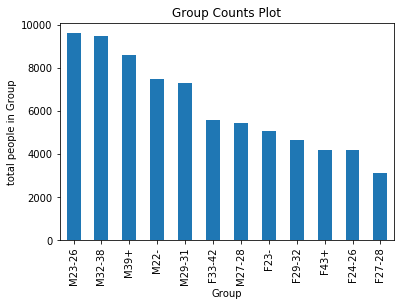

In [ ]:
gender_age_train['group'].value_counts().plot.bar()
plt.title('Group Counts Plot')
plt.xlabel('Group')
plt.ylabel('total people in Group')

<li>There are totally 12 groups,where male users are more than female users</li>
<li>Male age range -> 22-39+</li>
<li>Female age range -> 23-43+</li>
<li>Age wise we have more data in females and count wise male data is more.</li>

percentage of female:35.824234710965236%
percentage of male:64.17576528903477%


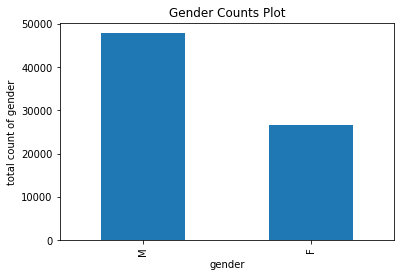

In [ ]:
gender_age_train['gender'].value_counts().plot.bar()
plt.title('Gender Counts Plot')
plt.xlabel('gender')
plt.ylabel('total count of gender')

gender_counts=gender_age_train['gender'].value_counts()
total=gender_counts[0]+gender_counts[1]
print("percentage of female:{0}%".format((gender_counts[1]/total)*100))
print("percentage of male:{0}%".format((gender_counts[0]/total)*100))

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'distPlot-gender vs age')

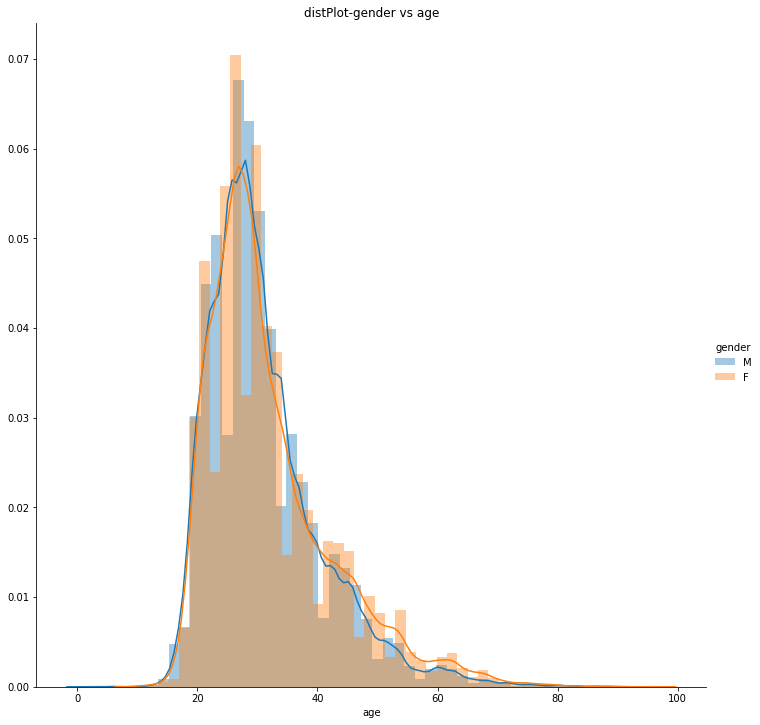

In [ ]:
sns.FacetGrid(gender_age_train,hue="gender", height=10) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("distPlot-gender vs age")




Text(0.5, 1.0, 'BoxPlot-Male age')

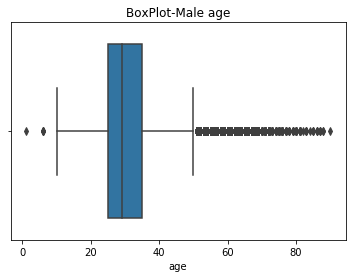

In [ ]:
df=gender_age_train[ (gender_age_train['gender']=='M') ]
sns.boxplot(x='age', data=df)
plt.title("BoxPlot-Male age")




Text(0.5, 1.0, 'BoxPlot-Female age')

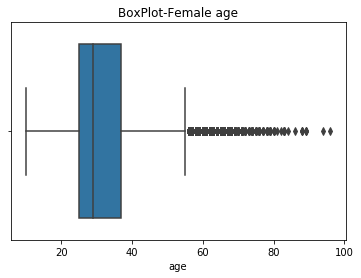

In [ ]:
df=gender_age_train[ (gender_age_train['gender']=='F') ]
sns.boxplot(x='age', data=df)
plt.title("BoxPlot-Female age")


In [ ]:
#Median, Quantiles, Percentiles, IQR.
import numpy as np

df_m=gender_age_train[ (gender_age_train['gender']=='M') ]
df_f=gender_age_train[ (gender_age_train['gender']=='F') ]

print("\nMedians:")
print(np.median(df_m['age']))
print(np.median(df_f['age']))


print("\nQuantiles:")
print(np.percentile(df_m['age'],np.arange(0, 101, 25)))
print(np.percentile(df_f['age'],np.arange(0, 101, 25)))

print("\n90th Percentiles:")
print(np.percentile(df_m['age'],90))
print(np.percentile(df_f['age'],90))

import statsmodels
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_m['age']))
print(robust.mad(df_f['age']))




Medians:
29.0
29.0

Quantiles:
[ 1. 25. 29. 35. 90.]
[10. 25. 29. 37. 96.]

90th Percentiles:
44.0
47.0

Median Absolute Deviation
7.41301109252801
7.41301109252801


<h5>Observation:</h5>
<li>25 and 75 Percentile Age values for Both Male and Female are similar</li>
<li>MAD is same for both Male and female</li>
<li>Evn though the count of male is higher than female ,the distribution of data in both is similar.</li>

In [ ]:
print(gender_age_test.shape)
gender_age_test.head()

(112071, 1)


,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


<h5>Observation:</h5>
<li>gender_age_test contains only device ids and has 112071 rows of data.</li>

<h3>Event,app events and labels analysis:<h3>

In [ ]:
events['device_id'].shape

(3252950,)

In [ ]:
event_timestamps=events['timestamp'].values
print("Event Start: ",np.min(event_timestamps))
print("Event End: ",np.max(event_timestamps))

Event Start:  2016-04-30 23:52:24
Event End:  2016-05-08 00:00:08


In [ ]:
events['hour']=events['timestamp'].map(lambda x:pd.to_datetime(x).hour)
events['hour']

0           0
1           0
2           0
3           0
4           0
           ..
3252945    23
3252946    23
3252947    23
3252948    23
3252949    23
Name: hour, Length: 3252950, dtype: int64

In [ ]:
events['night_active'] = ["Y" if (x>=23) or (x<=3) else "N" for x in events['hour']] 

'''for i,j in enumerate(events['hour']):
    if (i>23)|(i<3):
        events['night_active'][j]='Y'
    else:
        events['night_active'][j]='N'        
    
'''
events['night_active']

0          Y
1          Y
2          Y
3          Y
4          Y
          ..
3252945    Y
3252946    Y
3252947    Y
3252948    Y
3252949    Y
Name: night_active, Length: 3252950, dtype: object

In [ ]:
events_merged=gender_age_train.merge(events, left_on='device_id', right_on='device_id',how='inner')


Text(0.5, 1.0, 'CountPlot-Status vs nodes')

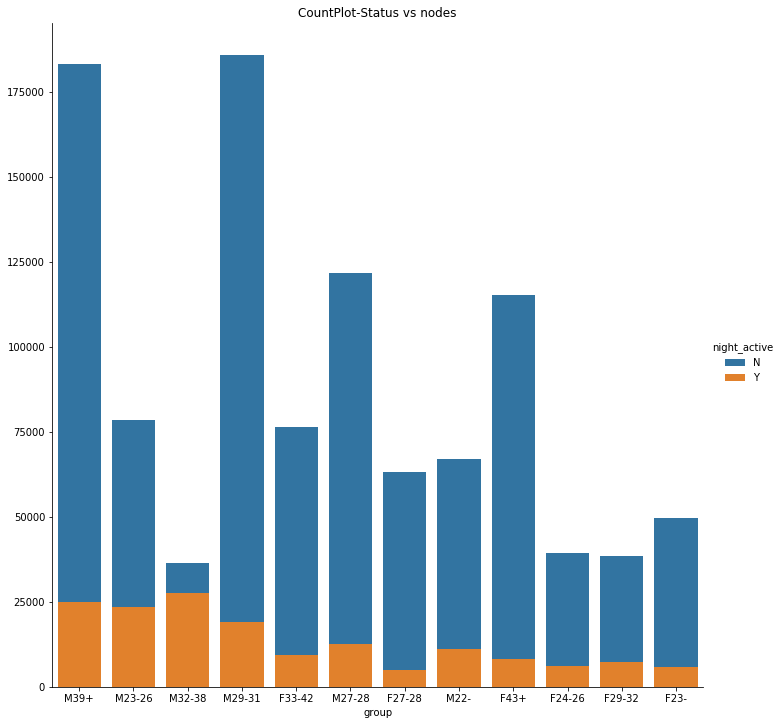

In [ ]:
sns.FacetGrid(events_merged,hue="night_active", size=10,) \
   .map(sns.countplot, "group") \
   .add_legend()  
plt.title("CountPlot-Status vs nodes")

 


<h5>Observation</h5>
<li>M32-38 has significant number of people who spent the phone between 11PM and 3AM.
<li>And comparitively Males use the phone at night more than women.

<h5>Observation</h5>
<li>Data is from 30th April 11.52PM to 8th April 12AM 2016</li>

In [ ]:
import math as m

events_merged=gender_age_train.merge(events, left_on='device_id', right_on='device_id',how='left')
events_merged['Events_Flag'] = ["N" if m.isnan(x) else "Y" for x in events_merged['event_id']] 


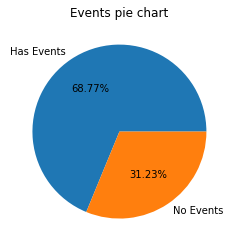

In [ ]:
events_merged=events_merged.groupby(["device_id","Events_Flag"])["device_id"].count().reset_index(name="count")

count=events_merged['Events_Flag'].value_counts()
label=['Has Events','No Events']
plt.pie(count, labels = label,autopct='%1.2f%%')
plt.title("Events pie chart")
plt.show()

<h5>Observation:</h5>
<li>Majority(68.77%) of Train data has events</li>

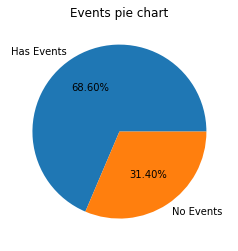

In [ ]:
import math as m

events_merged_test=events.merge(gender_age_test, left_on='device_id', right_on='device_id',how='right')
events_merged_test['Events_Flag'] = ["N" if m.isnan(x) else "Y" for x in events_merged_test['event_id']] 

events_merged_test=events_merged_test.groupby(["device_id","Events_Flag"])["device_id"].count().reset_index(name="count")

count=events_merged_test['Events_Flag'].value_counts()
label=['Has Events','No Events']
plt.pie(count, labels = label,autopct='%1.2f%%')
plt.title("Events pie chart")

plt.show()



<h5>Observation:</h5>
<li>Majority(68.60%) of Test data has events</li>

In [ ]:
events_merged

,device_id,Events_Flag,count
0,-9223067244542181226,N,1
1,-9222956879900151005,Y,65
2,-9222754701995937853,N,1
3,-9222352239947207574,N,1
4,-9222173362545970626,N,1
...,...,...,...
74640,9220914901466458680,Y,44
74641,9221152396628736959,N,1
74642,9221608286127666096,N,1
74643,9221843411551060582,N,1


In [ ]:
events_merged=gender_age_train.merge(events, left_on='device_id', right_on='device_id',how='left')


In [ ]:
#events_merged['device_id'].value_counts()
df_age=events_merged.groupby(["device_id","group"])["device_id"].count().reset_index(name="count")
df_age.head()


,device_id,group,count
0,-9223067244542181226,M23-26,1
1,-9222956879900151005,M32-38,65
2,-9222754701995937853,M29-31,1
3,-9222352239947207574,M23-26,1
4,-9222173362545970626,F43+,1


In [ ]:
#events_merged['device_id'].value_counts()
df_gender=events_merged.groupby(["device_id","gender"])["device_id"].count().reset_index(name="count")
df_gender.head()

,device_id,gender,count
0,-9223067244542181226,M,1
1,-9222956879900151005,M,65
2,-9222754701995937853,M,1
3,-9222352239947207574,M,1
4,-9222173362545970626,F,1


<h5>Observations:</h5>
<li>Assuming more the count of events means more the user is using the device.But from above two cells we can say that there is no relationship between age and gender of user and the amount of time user is using the device. </li>

In [ ]:
df_long=events["longitude"].value_counts()
df_long.head()

0.00      968711
1.00       76362
104.00     27977
116.39     14751
116.33      6721
Name: longitude, dtype: int64

In [ ]:
events['longitude'].describe()


count    3.252950e+06
mean     7.796192e+01
std      5.405801e+01
min     -1.800000e+02
25%      0.000000e+00
50%      1.129500e+02
75%      1.172100e+02
max      1.747600e+02
Name: longitude, dtype: float64

In [ ]:
df_lat=events["latitude"].value_counts()
df_lat.head()

0.00     968955
1.00      76375
30.00     28466
39.91     19289
34.74      6964
Name: latitude, dtype: int64

In [ ]:
events['latitude'].describe()


count    3.252950e+06
mean     2.162949e+01
std      1.569697e+01
min     -3.843000e+01
25%      0.000000e+00
50%      2.802000e+01
75%      3.407000e+01
max      5.994000e+01
Name: latitude, dtype: float64

In [ ]:
df_long_dev=events_merged.groupby(["longitude","latitude"])["device_id"].count().reset_index(name="count")
df_long_dev

,longitude,latitude,count
0,-180.00,0.00,144
1,-155.99,19.82,26
2,-122.32,47.64,1
3,-101.76,38.28,84
4,-101.76,44.85,7
...,...,...,...
32916,134.30,48.36,24
32917,134.30,48.37,1
32918,139.43,35.62,1
32919,139.56,35.62,1


<h5>Observations:</h5>
<li>25% of both longitude and latitude is at 0</li>
<li>other 75% is distributed</li>

In [ ]:
app_data=app_labels.merge(label_categories, left_on='label_id', right_on='label_id',how='inner')

app_data

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance
...,...,...,...
459938,-5364349117796323466,985,Word games
459939,6320161160475087425,985,Word games
459940,7641656572760613661,985,Word games
459941,-2037260970074339790,985,Word games


In [ ]:
label_categories['category'].value_counts()[0:15]

unknown                   26
Insurance                  3
Financial Information      3
music                      3
the film                   3
Pay                        3
health                     3
Lottery ticket             3
Science and Technology     3
Hotels                     2
Sports                     2
Simple                     2
service                    2
free                       2
Crowdfunding               2
Name: category, dtype: int64

label:  Industry tag  Percentage:  12.37  %
label:  Custom label  Percentage:  11.73  %
label:  Tencent  Percentage:  10.72  %
label:  game  Percentage:  10.59  %
label:  Property Industry 2.0  Percentage:  9.94  %
label:  1 free  Percentage:  4.15  %
label:  Services 1  Percentage:  2.57  %
label:  Property Industry new  Percentage:  2.16  %
label:  Relatives 1  Percentage:  1.96  %
label:  Irritation / Fun 1  Percentage:  1.92  %
label:  Cards RPG  Percentage:  1.6  %
label:  Casual puzzle categories  Percentage:  1.53  %
label:  Personal Effectiveness 1  Percentage:  1.28  %
label:  ARPG  Percentage:  1.15  %
label:  Chess categories  Percentage:  1.12  %


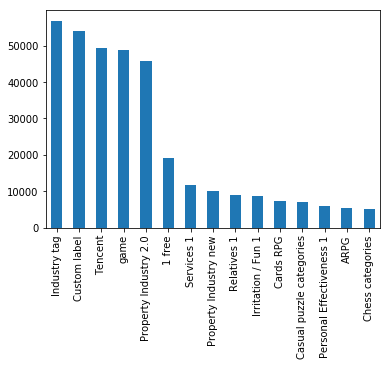

In [ ]:
app_data['category'].value_counts()[0:15].plot.bar()
cat_counts=dict(app_data['category'].value_counts())
cat_keys = [k for k in sorted(cat_counts, key=cat_counts.get, reverse=True)]
#Taking Top 15 keys with highest values 
cat_top_keys=cat_keys[:15]
cat_top_values=[cat_counts.get(k) for k in cat_top_keys]
counts=np.array(cat_top_values)
percent=(counts/app_data.shape[0])*100
for i in range(len(cat_top_keys)):
    print("label: ",cat_top_keys[i]," Percentage: ",np.round(percent[i],2)," %")

<h5>Observation:</h5>
<li>Top 5 labels consist of 55.35% market,out of which 3 are from gaming industry,hence we can say that gaming industry is leading the chinese market</li>

In [ ]:
app_labels[ app_labels['app_id']==9222542043353102991 ]

,app_id,label_id
43007,9222542043353102991,714
86013,9222542043353102991,704
117692,9222542043353102991,548


In [ ]:
app_dup=app_data.groupby(["app_id"])["app_id"].count().reset_index(name="count")
app_dup

,app_id,count
0,-9223281467940916832,4
1,-9222877069545393219,1
2,-9222785464897897681,4
3,-9222198347540756780,4
4,-9221970424041518544,7
...,...,...
113206,9222488106573038706,1
113207,9222542043353102991,3
113208,9222821882765325814,4
113209,9223029189880985324,1


In [ ]:

app_event_dup=app_events.groupby(["event_id"])["event_id"].count().reset_index(name="count")
app_event_dup

,event_id,count
0,2,19
1,6,38
2,7,40
3,9,35
4,16,31
...,...,...
1488091,3252935,14
1488092,3252936,3
1488093,3252937,19
1488094,3252946,69


In [ ]:
app_events['is_active'].value_counts()


0    19740071
1    12732996
Name: is_active, dtype: int64

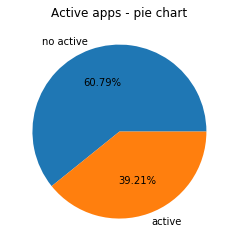

In [ ]:
app_events.head()
count=app_events['is_active'].value_counts()
label=['no active','active']
plt.pie(count, labels = label,autopct='%1.2f%%')
plt.title("Active apps - pie chart")
plt.show()

<h5>Observation</h5>
<li>From above 7 cells we can say that,In each event user has used multiple apps,and these apps belong to multiple categories.</li>
<li>Here all registered apps are installed but 39.21% are actively used.</li>


<h3>Phone brand,device analysis</h3>

In [ ]:
phone_dup=phone_data.groupby(["device_id"])["device_id"].count().reset_index(name="count")
phone_dup[ phone_dup["count"]>1 ]

,device_id,count
227,-9198513807097378193,2
274,-9194249084574705214,2
422,-9180330522697778980,2
1815,-9042966463857944795,2
2509,-8977849817626954804,2
...,...,...
185829,9134757794671046563,2
186177,9169567266060728256,2
186264,9178224089698771087,2
186429,9196371203514832504,2


In [ ]:
phone_dup=phone_data.groupby(["device_id","phone_brand","device_model"])["device_id"].count().reset_index(name="count")
phone_dup[ phone_dup["count"]>1 ]

,device_id,phone_brand,device_model,count
227,-9198513807097378193,酷派,F2,2
274,-9194249084574705214,vivo,Y29L,2
422,-9180330522697778980,华为,荣耀6 Plus,2
1815,-9042966463857944795,小米,红米1S,2
2509,-8977849817626954804,华为,荣耀4A,2
...,...,...,...,...
185835,9134757794671046563,三星,Galaxy S4,2
186183,9169567266060728256,奇酷,青春版,2
186270,9178224089698771087,联想,A590,2
186435,9196371203514832504,OPPO,R7 Plus,2


In [ ]:
phone_data[ phone_data["device_id"]==9134757794671046563 ]

,device_id,phone_brand,device_model
104783,9134757794671046563,三星,Galaxy S4
151796,9134757794671046563,三星,Galaxy S4


<h5>Observations</h5>
<li>Duplicates are present in phone data</li>

In [ ]:
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

In [ ]:


# # Translating the Chinese Terms in both columns to English
phone_data['phone_brand'] = phone_data['phone_brand'].apply(lambda x: english_phone_brands_mapping[x] if x in english_phone_brands_mapping else x)

In [ ]:
phone_data.head()


,device_id,phone_brand,device_model
0,-8890648629457979026,Xiaomi,红米
1,1277779817574759137,Xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,samsung,Galaxy Note 2


In [ ]:
brand_counts=dict(phone_data['phone_brand'].value_counts())
brand_keys = [k for k in sorted(brand_counts, key=brand_counts.get, reverse=True)]
#Taking Top 15 keys with highest values 
brand_top_keys=brand_keys[:15]
brand_top_values=[brand_counts.get(k) for k in brand_top_keys]

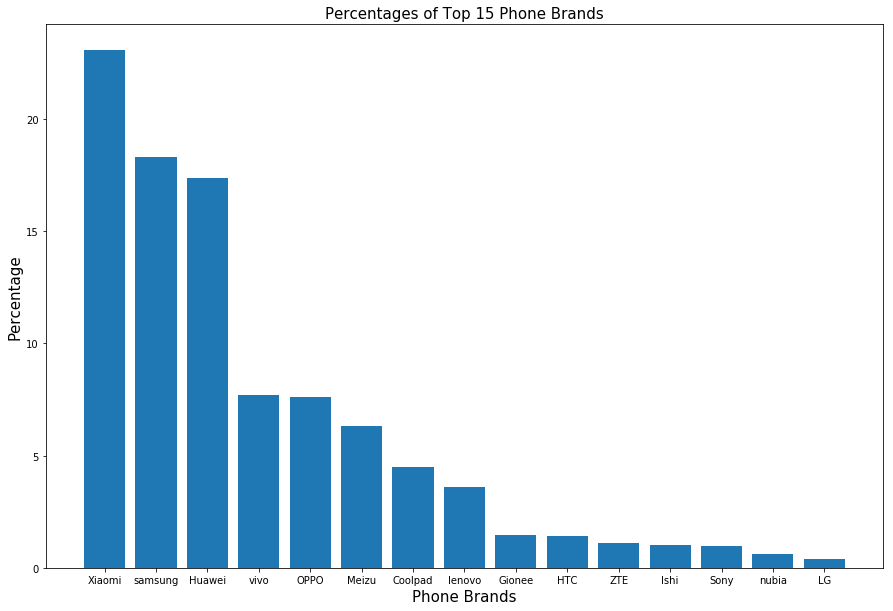

------------------------------------------------------------------------------------------
Brand:  Xiaomi  Percentage:  23.08  %
Brand:  samsung  Percentage:  18.31  %
Brand:  Huawei  Percentage:  17.39  %
Brand:  vivo  Percentage:  7.69  %
Brand:  OPPO  Percentage:  7.63  %
Brand:  Meizu  Percentage:  6.33  %
Brand:  Coolpad  Percentage:  4.49  %
Brand:  lenovo  Percentage:  3.61  %
Brand:  Gionee  Percentage:  1.48  %
Brand:  HTC  Percentage:  1.43  %
Brand:  ZTE  Percentage:  1.12  %
Brand:  lshi  Percentage:  1.03  %
Brand:  Sony  Percentage:  0.97  %
Brand:  nubia  Percentage:  0.61  %
Brand:  LG  Percentage:  0.41  %


In [ ]:
plt.figure(figsize=(15,10))
indices=np.arange(len(brand_top_keys))
counts=np.array(brand_top_values)
percent=(counts/phone_data.shape[0])*100
plt.bar(indices,percent)
plt.xlabel('Phone Brands',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Percentages of Top 15 Phone Brands',fontsize=15)
plt.xticks(indices,brand_top_keys)
plt.show()
print("-"*90)
for i in range(len(brand_top_keys)):
    print("Brand: ",brand_top_keys[i]," Percentage: ",np.round(percent[i],2)," %")

In [ ]:
phone_device_data=gender_age_train.merge(phone_data, left_on='device_id', right_on='device_id',how='inner')
phone_device_data

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,Xiaomi,红米note
4,245133531816851882,M,30,M29-31,Xiaomi,MI 3
...,...,...,...,...,...,...
74834,4682031842235089751,M,30,M29-31,Xiaomi,MI 3
74835,-9178703742877135986,M,30,M29-31,Xiaomi,MI 3
74836,180946546684162312,M,20,M22-,Xiaomi,红米note
74837,1390702386071991851,M,37,M32-38,Huawei,Ascend P8


Text(0.5, 1.0, 'CountPlot-Status vs nodes')

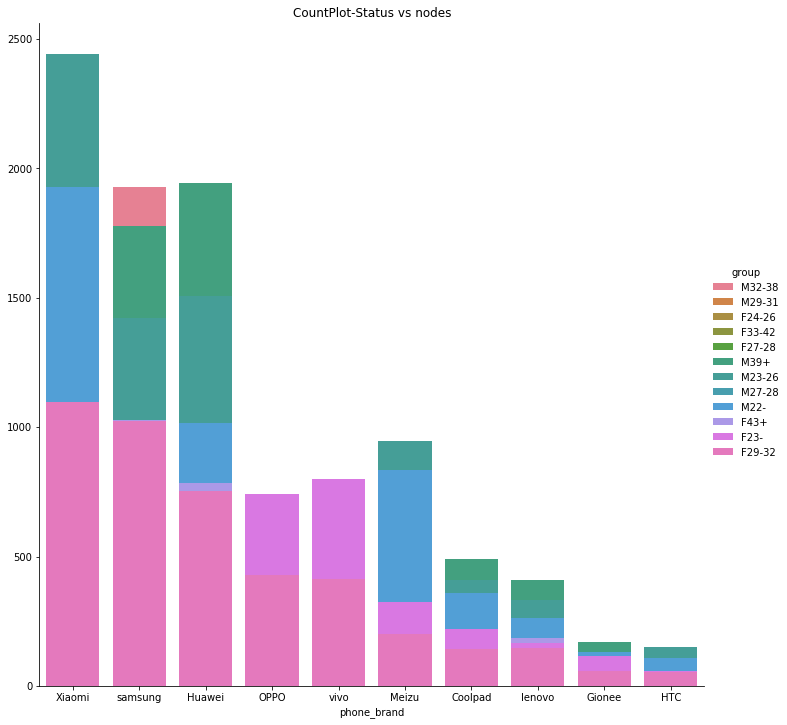

In [ ]:
sns.FacetGrid(phone_device_data,hue="group", size=10,) \
   .map(sns.countplot, "phone_brand",order=phone_device_data.phone_brand.value_counts().iloc[:10].index) \
   .add_legend()  
plt.title("CountPlot-Status vs nodes")

 


Text(0.5, 1.0, 'CountPlot-Status vs nodes')

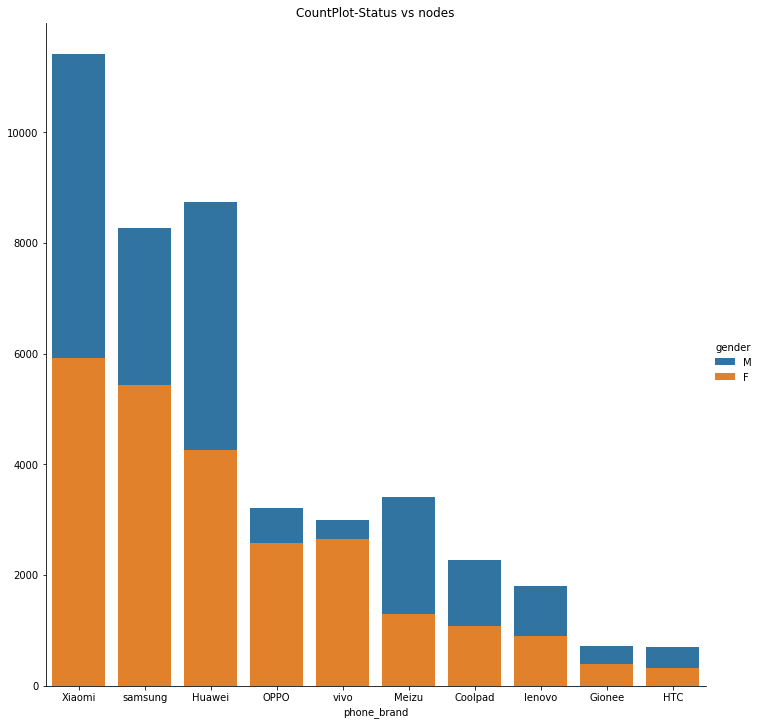

In [ ]:
sns.FacetGrid(phone_device_data,hue="gender", size=10,) \
   .map(sns.countplot, "phone_brand",order=phone_device_data.phone_brand.value_counts().iloc[:10].index) \
   .add_legend()  
plt.title("CountPlot-Status vs nodes")

 


<h5>Observation:</h5>
    <li>Top phone brands used are Xiaomi,samsung,huawei.
    <li>Top 3 brands consist of 58.78% of phones and hence they are dominating the mobile industry.
    <li>Other brands consist of 41.22% of phones.
     <li>We can also see that there is no linear/not linear relation of group vs phone_brand,but since its the only data available for devices without events,These will be used for classification,but most of the sales of oppo and vivo are from females which can be due its phone filters.
    

<h3>Summary:</h3>



<li>There are totally 12 groups,where male users are more than female users</li>
<li>Male age range -> 22-39+</li>
<li>Female age range -> 23-43+</li>
<li>Age wise we have more data in females and count wise male data is more.</li>
<li>25 and 75 Percentile Age values for Both Male and Female are similar</li>
<li>MAD is same for both Male and female</li>
<li>Even though the count of male is higher than female ,the distribution of data in both is similar.</li>
<li>Majority(68.77%) of Train data has events</li>
<li>Majority(68.80%) of Test data has events</li>
<li>Data is from 30th April 11.52PM to 8th May 12AM 2016</li>
<li>M32-38 has significant number of people who spent the phone between 11PM and 3AM.
<li>And comparitively Males use the phone at night more than women.
<li>Assuming more the count of events means more the user is using the device.But from above two cells we can say that there is no relationship between age and gender of user and the amount of time user is using the device. </li>
<li>In each event user has used multiple apps,and these apps belong to multiple categories.</li>
<li>Here all registered apps are installed but 39.21% are actively used(Train).</li>
<li>Duplicates are present in phone data which need to be removed</li>
<li>Phone data is the only the data present for devices without events.</li>
<li>Top 3 brands consist of 58.78% of phones and hence they are dominating the mobile industry.</li>




<h3>Insight:</h3>


<li>Around 32% data has no events for which only phone brand and model are considered as features.</li>
<li>For data with events(68%),features below are decided to be used for the further process.</li>  

<h3>Features decided after EDA</h3>


<li>mode of longitude(of all events and timestamps)</li>
<li>mode of latitude(of all events and timestamps)</li>
<li>BOW/TFIDF approach of apps used(active) by that particular device</li>
<li>BOW/TFIDF approach of labels of apps used(active) by that particular device</li>
<li>BOW approach of phone brand(one hot encoding,since these consist of different languages)</li>
<li>BOW approach of phone model(one hot encoding,since these consist of different languages)</li>
<li>weekday the event has occured(one hot encoded)</li>
<li>App Awareness:Ratio of total no of apps installed by total no of apps registered</li>
<li>App Usage:Ratio of total no of apps active by total no of apps installed</li>
<li>count of timestamps of device usage between 11PM and 3AM.</li>
  


<h1>Data Preprocessing</h1>

<li>Drop age and gender column from train data.
<li>encode class variables.
<li>Add flag to differentiate device with and without events.
<li>Add hour and night_active for events.
<li>Remove duplicates in phone_brand and models.
<li>Change chinese phone_brands to english.

#Drop age and gender column from train data.

In [ ]:
gender_age_train=gender_age_train.drop(['gender','age'],axis=1)
gender_age_train.head()

,device_id,group
0,-8076087639492063270,M32-38
1,-2897161552818060146,M32-38
2,-8260683887967679142,M32-38
3,-4938849341048082022,M29-31
4,245133531816851882,M29-31


In [ ]:
#encode class variables.

In [ ]:
gender_age_train['group'].unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [ ]:
from sklearn import preprocessing

Label_encoder = preprocessing.LabelEncoder()
encoded_Labels_train=Label_encoder.fit_transform(gender_age_train['group'])
gender_age_train['group']=encoded_Labels_train

In [ ]:
gender_age_train.head()

,device_id,group
0,-8076087639492063270,10
1,-2897161552818060146,10
2,-8260683887967679142,10
3,-4938849341048082022,9
4,245133531816851882,9


In [ ]:
gender_age_train['group'].unique()

array([10,  9,  1,  4,  2, 11,  7,  8,  6,  5,  0,  3])

#encode app_id labels

In [ ]:
from sklearn import preprocessing

Label_encoder = preprocessing.LabelEncoder()
encoded_Labels_train=Label_encoder.fit_transform(gender_age_train['group'])
gender_age_train['group']=encoded_Labels_train

#Add flag to differentiate device with and without events.

In [ ]:
import math as m

events_merged_train=gender_age_train.merge(events, left_on='device_id', right_on='device_id',how='left')
events_merged_train['Events_Flag'] = ["N" if m.isnan(x) else "Y" for x in events_merged_train['event_id']] 


events_merged_test=gender_age_test.merge(events, left_on='device_id', right_on='device_id',how='left')
events_merged_test['Events_Flag'] = ["N" if m.isnan(x) else "Y" for x in events_merged_test['event_id']] 


In [ ]:
events_merged_train[events_merged_train['Events_Flag']=="N"]

,device_id,group,event_id,timestamp,longitude,latitude,Events_Flag
0,-8076087639492063270,10,NaN,NaN,NaN,NaN,N
1,-2897161552818060146,10,NaN,NaN,NaN,NaN,N
3,-4938849341048082022,9,NaN,NaN,NaN,NaN,N
4,245133531816851882,9,NaN,NaN,NaN,NaN,N
5,-1297074871525174196,1,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...
1266907,-3539330294838027409,7,NaN,NaN,NaN,NaN,N
1266909,-4752726726975186730,7,NaN,NaN,NaN,NaN,N
1266910,4682031842235089751,9,NaN,NaN,NaN,NaN,N
1266911,-9178703742877135986,9,NaN,NaN,NaN,NaN,N


#Remove duplicates in phone_brand and models.

In [ ]:

phone_data.shape

(187245, 3)

In [ ]:
phone_data.drop_duplicates(keep='first',inplace=True) 
phone_data.shape

(186722, 3)

#Change chinese phone brand names to english/

In [ ]:
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

# # Translating the Chinese Terms in both columns to English
phone_data['phone_brand'] = phone_data['phone_brand'].apply(lambda x: english_phone_brands_mapping[x] if x in english_phone_brands_mapping else x)

<li>mode of longitude(of all events and timestamps)</li>
<li>mode of latitude(of all events and timestamps)</li>
<li>TFIDF approach of apps used(active) by that particular device</li>
<li>TFIDF approach of labels of apps used(active) by that particular device</li>
<li>BOW approach of phone brand(one hot encoding,since these consist of different languages)</li>
<li>BOW approach of phone model(one hot encoding,since these consist of different languages)</li>
<li>App Awareness:Ratio of total no of apps installed by total no of apps registered</li>
<li>App Usage:Ratio of total no of apps active by total no of apps installed</li>
<li> tfidf weekday
<li> tfidf hours


<h2>Data Preparation:</h2>

- separate out the data with events and without.
- Prepare datasets for both types of data.
    

In [ ]:
train_data_w_events=events_merged_train.loc[events_merged_train['Events_Flag']=="Y"]
test_data_w_events=events_merged_test.loc[events_merged_test['Events_Flag']=="Y"]



In [ ]:
train_data_wo_events=events_merged_train.loc[events_merged_train['Events_Flag']=="N"]
test_data_wo_events=events_merged_test.loc[events_merged_test['Events_Flag']=="N"]



In [ ]:
#removing all other Nan columns

train_data_wo_events=train_data_wo_events[['device_id','group']]
test_data_wo_events=test_data_wo_events[['device_id']]

In [ ]:
train_data_wo_events=train_data_wo_events.merge(phone_data, left_on='device_id', right_on='device_id',how='left')
test_data_wo_events=test_data_wo_events.merge(phone_data, left_on='device_id', right_on='device_id',how='left')


In [ ]:
train_data_wo_events

,device_id,group,phone_brand,device_model
0,-8076087639492063270,10,Xiaomi,MI 2
1,-2897161552818060146,10,Xiaomi,MI 2
2,-4938849341048082022,9,Xiaomi,红米note
3,245133531816851882,9,Xiaomi,MI 3
4,-1297074871525174196,1,OPPO,R1C
...,...,...,...,...
51331,-3539330294838027409,7,TCL,么么哒
51332,-4752726726975186730,7,samsung,Galaxy Note 3
51333,4682031842235089751,9,Xiaomi,MI 3
51334,-9178703742877135986,9,Xiaomi,MI 3


#features for data with events

In [ ]:
train_w_events = pd.DataFrame() 
train_w_events['device_id']=train_data_w_events['device_id'].unique()



In [ ]:
labels=[]
for dev_id in train_w_events['device_id']:
    df_deviceId=train_data_w_events[train_data_w_events['device_id']==dev_id]
    label=df_deviceId['group'].unique()[0]
    labels.append([dev_id,label])


In [ ]:
labels=np.array(labels)

In [ ]:
test_w_events = pd.DataFrame() 
test_w_events['device_id']=test_data_w_events['device_id'].unique()


In [ ]:
train_data_w_events=train_data_w_events.merge(app_events, left_on='event_id', right_on='event_id',how='left')
test_data_w_events=test_data_w_events.merge(app_events, left_on='event_id', right_on='event_id',how='left')


In [ ]:
app_labels=app_labels.merge(label_categories, left_on='label_id', right_on='label_id',how='left')


In [ ]:
total_apps=app_events['app_id'].unique()
len(total_apps)

19237

In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:

'''Columns:
        1.mode of longitude
        2.mode of latitude
        3.all active app ids - for bow
        4.all installed app ids -for bow
        5.app usage = no. of active apps/no. of installed apps
        6.app awareness=no. of installed apps/total no of apps
        7.categoreis of all apps - for tfidf
        8.hour of timestamp - for tfidf
        9.day of week of the event - for tfidf
        10.phone brand
        11.phone model
'''

def get_coloumn_data(main_table,data_table,app_labels):

    installed_apps=[]
    active_apps=[]
    app_usage=[]
    app_awareness=[]
    longitude=[]
    latitude=[]
    categories=[]
    hour_data=[]
    weekdays_data=[]
    phonebrand=[]
    phonemodel=[]
    for indx,ele in tqdm_notebook(enumerate(main_table['device_id']),total=main_table.shape[0]):
        categories_individual=''
        hour_all=''
        weekday_all=''
        activeapps_string=''
        installedapps_string=''
        df_deviceId=data_table[data_table['device_id']==ele]
        phone_brand=phone_data.loc[phone_data['device_id']==ele,'phone_brand'].tolist()[0]
        phone_model=phone_data.loc[phone_data['device_id']==ele,'device_model'].tolist()[0]

        activeapps_indvidual=df_deviceId.loc[df_deviceId['is_active']==1,'app_id'].tolist()  #getting active apps of particular device_id
        active_app_count=len(active_apps) 
        installedapps_indvidual=df_deviceId.loc[df_deviceId['is_installed']==1,'app_id'].tolist()   #getting installed apps of particular device_id
        installed_app_count=len(installed_apps)
        mode_long=df_deviceId['longitude'].value_counts().index.tolist()[0] #mode of longitude
        mode_latitude=df_deviceId['latitude'].value_counts().index.tolist()[0] #mode of latitude
    
    #gets active apps_id in a string form
        for app in activeapps_indvidual:
            activeapps_string=activeapps_string+" "+str(app)
        
    #gets installed apps_id in a string form
        for installed_app in installedapps_indvidual:
            installedapps_string=installedapps_string+" "+str(installed_app)
    
    # gets all hours and weekday numbers as strings,in 2 different columns.
        timestamp_list=df_deviceId['timestamp'].value_counts().index.tolist()
        for timestamp in timestamp_list:
            hour=pd.to_datetime(timestamp).hour
            day_of_week=pd.to_datetime(timestamp).dayofweek
            hour_all=hour_all+" 0"+str(hour) #adding 0 because tfidf wont consider single digit nos.
            weekday_all=weekday_all+" 0"+str(day_of_week)  #adding 0 because tfidf wont consider single digit nos.
    #gets all the labels in the form of sting. 
        app_id_list=df_deviceId['app_id'].unique().tolist()
        for app_id in app_id_list:
            categories_list=app_labels.loc[app_labels['app_id']==app_id,'category'].unique().tolist()
            categories_list=' '.join(categories_list)
            categories_individual=categories_individual+" "+categories_list
    
        phonebrand.append(phone_brand)
        phonemodel.append(phone_model)
        hour_data.append(hour_all)
        weekdays_data.append(weekday_all)
        installed_apps.append(installedapps_string)
        active_apps.append(activeapps_string)
        categories.append(categories_individual)
        app_usage.append(((active_app_count+1)/(installed_app_count+1)))
        app_awareness.append(((installed_app_count+1)/(len(total_apps)+1)))
        longitude.append(mode_long)
        latitude.append(mode_latitude)
    
    return hour_data,weekdays_data,installed_apps,active_apps,app_usage,app_awareness,latitude,longitude,categories,phonebrand,phonemodel


In [ ]:

print("Extracting Train data")
hour_train,weekdays_train,installed_apps_train,active_apps_train,app_usage_train,app_awareness_train,latitude_train,longitude_train,categories_train,phonebrand_train,phone_model_train=get_coloumn_data(train_w_events,train_data_w_events,app_labels)

print("Extracting Test Data")

hour_test,weekdays_test,installed_apps_test,active_apps_test,app_usage_test,app_awareness_test,latitude_test,longitude_test,categories_test,phonebrand_test,phone_model_test=get_coloumn_data(test_w_events,test_data_w_events,app_labels)

Extracting Train data


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Extracting Test Data


<h1>Feature Engineering:</h1>

<h3>With Events:</h3>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer1 = CountVectorizer()
vectorizer1.fit(active_apps_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
active_apps_BOW_train = vectorizer1.transform(active_apps_train)
active_apps_BOW_test = vectorizer1.transform(active_apps_test)



In [ ]:
vectorizer1 = CountVectorizer()

vectorizer1.fit(installed_apps_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
installed_apps_BOW_train = vectorizer1.transform(installed_apps_train)
installed_apps_BOW_test = vectorizer1.transform(installed_apps_test)



In [ ]:
vectorizer1 = CountVectorizer()

vectorizer1.fit(phonebrand_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
phone_brand_BOW_train = vectorizer1.transform(phonebrand_train)
phone_brand_BOW_test = vectorizer1.transform(phonebrand_test)



In [ ]:
vectorizer1.fit(phone_model_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
phone_model_BOW_train = vectorizer1.transform(phone_model_train)
phone_model_BOW_test = vectorizer1.transform(phone_model_test)



In [ ]:
tfidfvectorizer = TfidfVectorizer()
tfidfvectorizer.fit(categories_train)# fit has to happen only on train data

categories_tfidf_train=tfidfvectorizer.transform(categories_train)
categories_tfidf_test=tfidfvectorizer.transform(categories_test)


In [ ]:
tfidfvectorizer = TfidfVectorizer()

tfidfvectorizer.fit(hour_train)# fit has to happen only on train data

hour_tfidf_train=tfidfvectorizer.transform(hour_train)
hour_tfidf_test=tfidfvectorizer.transform(hour_test)


In [ ]:
tfidfvectorizer = TfidfVectorizer()

tfidfvectorizer.fit(weekdays_train)# fit has to happen only on train data

weekdays_tfidf_train=tfidfvectorizer.transform(weekdays_train)
weekdays_tfidf_test=tfidfvectorizer.transform(weekdays_test)


In [ ]:
from sklearn import preprocessing

#app usage

app_usage_train_pd = pd.DataFrame(app_usage_train)
app_usage_test_pd = pd.DataFrame(app_usage_test) 

app_usage_train_norm=preprocessing.normalize(app_usage_train_pd.values.reshape(1,-1), norm='l2')
app_usage_test_norm=preprocessing.normalize(app_usage_test_pd.values.reshape(1,-1), norm='l2')

app_usage_train_norm=app_usage_train_norm.reshape(-1,1)
app_usage_test_norm=app_usage_test_norm.reshape(-1,1)
#app awareness

'''it is already normalised since the formula is (total no of apps installed)/(total no of apps)'''

app_awareness_train_norm=np.array(app_awareness_train).reshape(-1,1)
app_awareness_test_norm=np.array(app_awareness_test).reshape(-1,1)

#latitude

latitude_train_pd = pd.DataFrame(latitude_train)
latitude_test_pd = pd.DataFrame(latitude_test)

latitude_train_norm=preprocessing.normalize(latitude_train_pd, norm='l2')
latitude_test_norm=preprocessing.normalize(latitude_test_pd, norm='l2')

latitude_train_norm=latitude_train_norm.reshape(-1,1)
latitude_test_norm=latitude_test_norm.reshape(-1,1)

#longitude

longitude_train_pd = pd.DataFrame(longitude_train)
longitude_test_pd = pd.DataFrame(longitude_test)

longitude_train_norm=preprocessing.normalize(longitude_train_pd, norm='l2')
longitude_test_norm=preprocessing.normalize(longitude_test_pd, norm='l2')

longitude_train_norm=longitude_train_norm.reshape(-1,1)
longitude_test_norm=longitude_test_norm.reshape(-1,1)



In [ ]:
device_id_list_train=train_w_events['device_id'].values
device_id_list_train=device_id_list_train.reshape(-1,1)


In [ ]:
device_id_list_test=test_w_events['device_id'].values
device_id_list_test=device_id_list_test.reshape(-1,1)

In [ ]:
from scipy.sparse import hstack


X_train_w_events = hstack((phone_brand_BOW_train,phone_model_BOW_train,active_apps_BOW_train,installed_apps_BOW_train,categories_tfidf_train,hour_tfidf_train,weekdays_tfidf_train,app_usage_train_norm,app_awareness_train_norm,latitude_train_norm,longitude_train_norm)).tocsr()
X_test_w_events = hstack((phone_brand_BOW_test,phone_model_BOW_test,active_apps_BOW_test,installed_apps_BOW_test,categories_tfidf_test,hour_tfidf_test,weekdays_tfidf_test,app_usage_test_norm,app_awareness_test_norm, latitude_test_norm,longitude_test_norm)).tocsr()
print("Final Data matrix")
print(X_train_w_events.shape)
print(X_test_w_events.shape)
print("="*100)

Final Data matrix
(23309, 22019)
(35194, 22019)


In [ ]:
from scipy import sparse

sparse.save_npz("X_train_w_events", X_train_w_events)


In [ ]:
sparse.save_npz("X_test_w_events", X_test_w_events)


In [ ]:
labels_pd = pd.DataFrame(labels, columns=["device_id","label"])
labels_pd.to_csv('labels_w_events.csv', index=False)

<h3>Without Events:</h3>

In [ ]:
device_id_woE_train=train_data_wo_events['device_id'].values
device_id_woE_train=device_id_woE_train.reshape(-1,1)

In [ ]:
device_id_woE_test=test_data_wo_events['device_id'].values
device_id_woE_test=device_id_woE_test.reshape(-1,1)

In [ ]:
test_data_wo_events['device_id'].shape

(76880,)

In [ ]:
train_data_wo_events

,device_id,group,phone_brand,device_model
0,-8076087639492063270,10,Xiaomi,MI 2
1,-2897161552818060146,10,Xiaomi,MI 2
2,-4938849341048082022,9,Xiaomi,红米note
3,245133531816851882,9,Xiaomi,MI 3
4,-1297074871525174196,1,OPPO,R1C
...,...,...,...,...
51331,-3539330294838027409,7,TCL,么么哒
51332,-4752726726975186730,7,samsung,Galaxy Note 3
51333,4682031842235089751,9,Xiaomi,MI 3
51334,-9178703742877135986,9,Xiaomi,MI 3


In [ ]:
labels_woE=[]
for dev_id in train_data_wo_events['device_id']:
    df_deviceId=train_data_wo_events[train_data_wo_events['device_id']==dev_id]
    label=df_deviceId['group'].unique()[0]
    labels_woE.append([dev_id,label])
labels_woE=np.array(labels_woE)

In [ ]:
labels_woE_pd = pd.DataFrame(labels_woE, columns=["device_id","label"])
labels_woE_pd.to_csv('labels_wo_events.csv', index=False)

In [ ]:
vectorizer = CountVectorizer()

vectorizer.fit(train_data_wo_events['phone_brand']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
phone_brand_BOW_train_woE = vectorizer.transform(train_data_wo_events['phone_brand'])
phone_brand_BOW_test_woE = vectorizer.transform(test_data_wo_events['phone_brand'])



In [ ]:
vectorizer = CountVectorizer()

vectorizer.fit(train_data_wo_events['device_model']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
phone_model_BOW_train_woE = vectorizer.transform(train_data_wo_events['device_model'])
phone_model_BOW_test_woE = vectorizer.transform(test_data_wo_events['device_model'])



In [ ]:
from scipy.sparse import hstack


X_train_wo_events = hstack((phone_brand_BOW_train_woE,phone_model_BOW_train_woE)).tocsr()
X_test_wo_events = hstack((phone_brand_BOW_test_woE,phone_model_BOW_test_woE)).tocsr()
print("Final Data matrix")
print(X_train_wo_events.shape)
print(X_test_wo_events.shape)
print("="*100)

Final Data matrix
(51336, 1358)
(76880, 1358)


In [ ]:
sparse.save_npz("X_train_wo_events.npz", X_train_wo_events)


In [ ]:
sparse.save_npz("X_test_wo_events.npz", X_test_wo_events)


In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    B =(C/C.sum(axis=0))
    
    labels = ['F23-', 'F24-26', 'F27-28' ,'F29-32' ,'F33-42','F43+' ,'M22-' ,'M23-26','M27-28', 'M29-31' ,'M32-38' ,'M39+']
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap='YlGnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    
    
    
    
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap='YlGnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap='YlGnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>Predicting Models</h1>

In [4]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


<h2>No Events:</h2>

In [ ]:

X_train_woE =sparse.load_npz('X_train_wo_events.npz')
X_test_woE = sparse.load_npz('X_test_wo_events.npz')
y_train_woE=pd.read_csv("labels_wo_events.csv") 


In [ ]:
x_woe=pd.DataFrame(X_train_woE)

In [ ]:
x_woe.head()

,0
0,"(0, 89)\t1\n (0, 717)\t1"
1,"(0, 89)\t1\n (0, 717)\t1"
2,"(0, 89)\t1\n (0, 1301)\t1"
3,"(0, 89)\t1\n (0, 717)\t1"
4,"(0, 66)\t1\n (0, 824)\t1"


In [ ]:
y_train_woE.head()

,device_id,label
0,-8076087639492063270,10
1,-2897161552818060146,10
2,-4938849341048082022,9
3,245133531816851882,9
4,-1297074871525174196,1


In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train_woE, y_train_woE['label'],stratify=y_train_woE['label'],test_size=0.20)

## Logistic Regression:

In [ ]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-6, 2)]

cv_log_error_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, multi_class='multinomial',solver='lbfgs',class_weight='balanced')
    clf.fit(X_train, y_train)
    #Using Model Calibration
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of C = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


best_c = np.argmin(cv_log_error_array)
clf = LogisticRegression(C=alpha[best_c], multi_class='multinomial', solver='lbfgs',class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best C = ', alpha[best_c], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best C = ', alpha[best_c], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

For values of C =  1e-06 The log loss is: 2.4141703522501943
For values of C =  1e-05 The log loss is: 2.4141310514616987
For values of C =  0.0001 The log loss is: 2.4138029296507164
For values of C =  0.001 The log loss is: 2.4115543680726956
For values of C =  0.01 The log loss is: 2.4060781637409225
For values of C =  0.1 The log loss is: 2.400923308454263
For values of C =  1 The log loss is: 2.4023151423271174
For values of C =  10 The log loss is: 2.409384438717328
For values of best C =  0.1 The train log loss is: 2.3679921106160617
For values of best C =  0.1 The cross validation log loss is: 2.400923308454263


Train Log Loss : 2.36771447448319
Number of misclassified points  82.31956754650824
-------------------------------------------------- Confusion matrix --------------------------------------------------


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


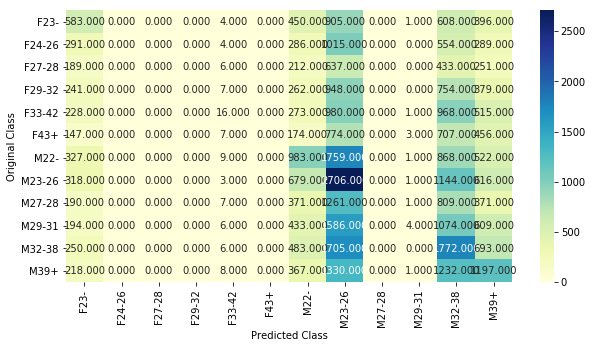

-------------------------------------------------- Precision matrix --------------------------------------------------


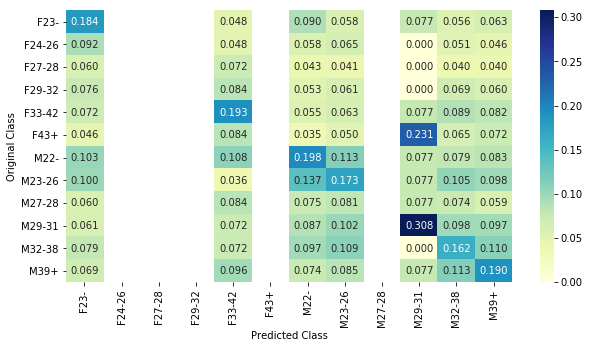

Sum of columns in precision matrix [ 1. nan nan nan  1. nan  1.  1. nan  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


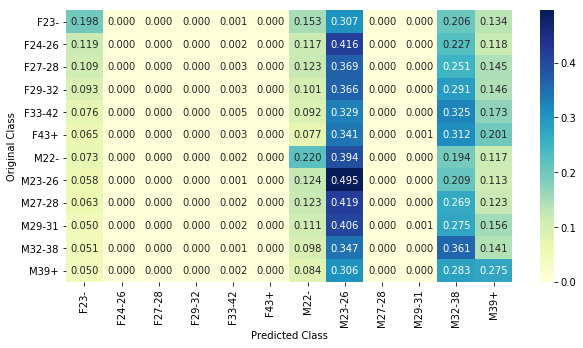

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV Log Loss : 2.4009386852712353
Number of misclassified points  84.64160498636541
-------------------------------------------------- Confusion matrix --------------------------------------------------


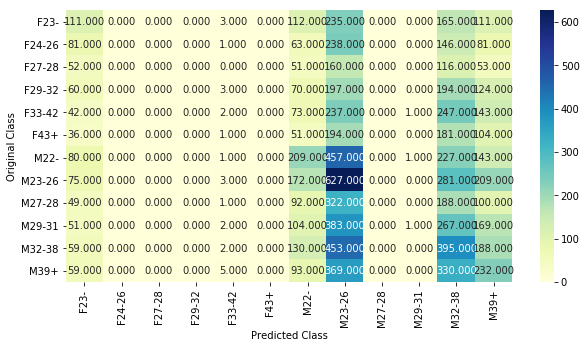

-------------------------------------------------- Precision matrix --------------------------------------------------


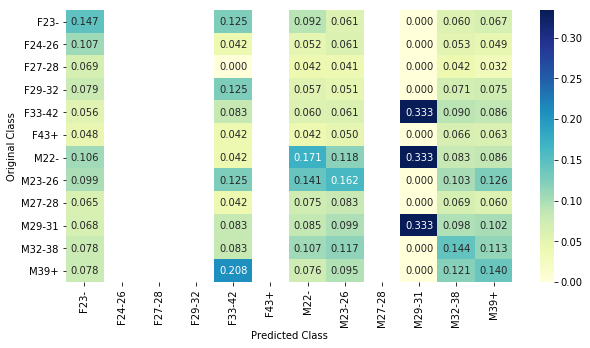

Sum of columns in precision matrix [ 1. nan nan nan  1. nan  1.  1. nan  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


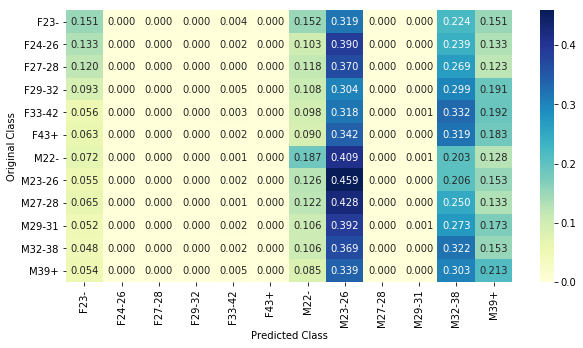

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#Refered from AAIC Personalized Cancer Diagnosis
best_c=0.1
lr = LogisticRegression(C=best_c, multi_class='multinomial',solver='lbfgs',class_weight='balanced', )
lr.fit(X_train, y_train)
#Using Model Calibration
lr_sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
lr_sig_clf.fit(X_train, y_train)

lr_no_events_train_prediction=lr_sig_clf.predict_proba(X_train)
lr_no_events_cv_prediction=lr_sig_clf.predict_proba(X_cv)
lr_no_events_test_prediction=lr_sig_clf.predict_proba(X_test_woE)

train_predicted_classes=np.argmax(lr_no_events_train_prediction, axis=1)
cv_predicted_classes=np.argmax(lr_no_events_cv_prediction, axis=1)


print("Train Log Loss :",log_loss(y_train, lr_no_events_train_prediction))
plot_confusion_matrix(y_train,train_predicted_classes)

print("="*60)

print("CV Log Loss :",log_loss(y_cv, lr_no_events_cv_prediction))
plot_confusion_matrix(y_cv,cv_predicted_classes )

### XGBOOST:

alpha in progress: 10
XGB Classifer fit completed.
Calibrated Classifer fit completed.
prediction proba completed.
######################################################################################################################################################
alpha in progress: 50
XGB Classifer fit completed.
Calibrated Classifer fit completed.
prediction proba completed.
######################################################################################################################################################
alpha in progress: 100
XGB Classifer fit completed.
Calibrated Classifer fit completed.
prediction proba completed.
######################################################################################################################################################
alpha in progress: 500
XGB Classifer fit completed.
Calibrated Classifer fit completed.
prediction proba completed.
#####################################################################################

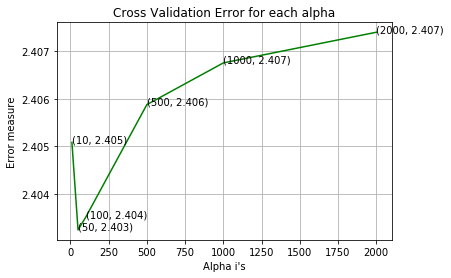

For values of best alpha =  50 The train log loss is: 2.3689917703703287
Number of misclassified points  82.20025323853122
-------------------------------------------------- Confusion matrix --------------------------------------------------


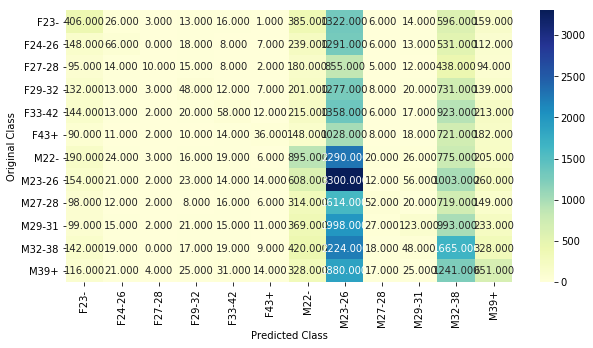

-------------------------------------------------- Precision matrix --------------------------------------------------


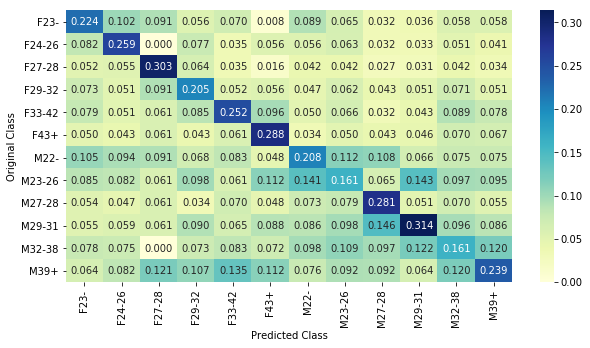

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


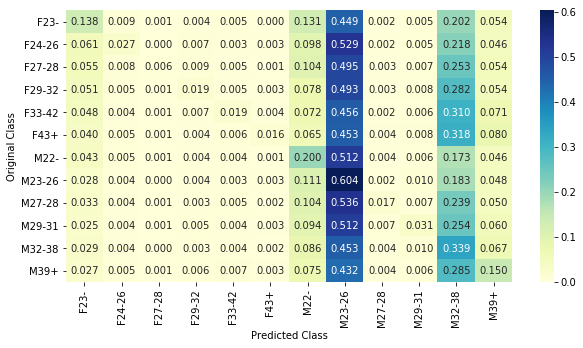

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
For values of best alpha =  50 The cross validation log loss is: 2.4032440689302894
Number of misclassified points  84.95325282430854
-------------------------------------------------- Confusion matrix --------------------------------------------------


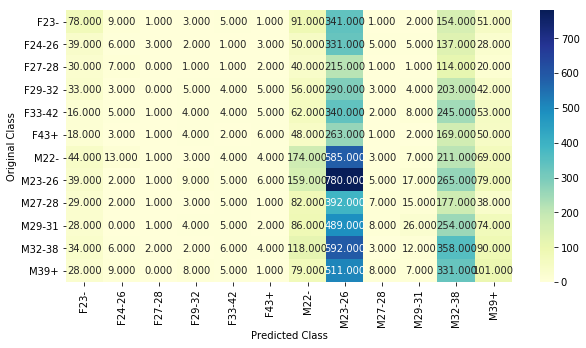

-------------------------------------------------- Precision matrix --------------------------------------------------


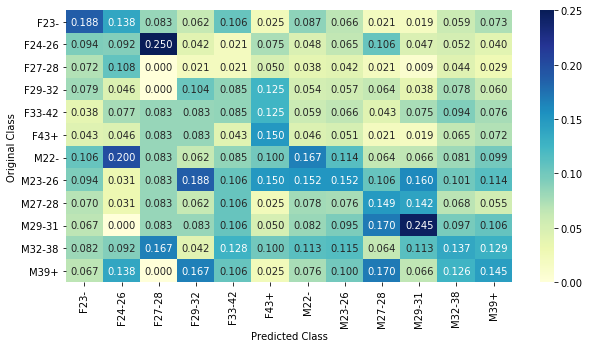

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


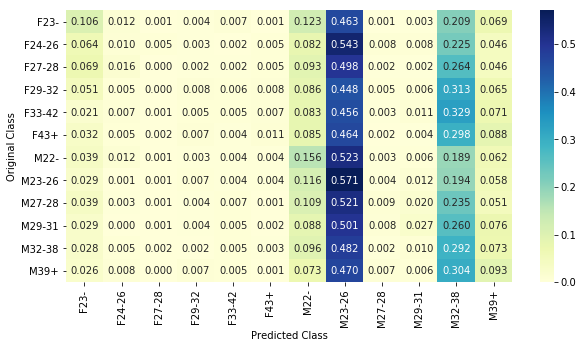

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    print("alpha in progress:",i)
    x_cfl=XGBClassifier(n_estimators=i,nthread  = 8,objective='multi:softprob',num_class=12,eval_metric='mlogloss')
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))


for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=8,objective='multi:softprob',num_class=12,eval_metric='mlogloss')
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
plot_confusion_matrix(y_train, sig_clf.predict(X_train))

predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
plot_confusion_matrix(y_cv, sig_clf.predict(X_cv))

#predict_y = sig_clf.predict_proba(X_test)
#print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))


**Neural NEtworks:**

In [ ]:
!wget --header="Host: doc-0g-6o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_o7k7vkj5s9imiouj80e98dpd6h26jfoj=06830476918003228496|1602057300000|ginirm9humvsvvkjnn8rfp9dq74kiqv0" --header="Connection: keep-alive" "https://doc-0g-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/9isces5v2ld5nt1vm0a7i5g1asv09069/1602057375000/06830476918003228496/06830476918003228496/1hA3fixYZYWypuv0FaasjQIsZ2h6Y-6tN?e=download&authuser=0" -c -O 'X_train_w_events.npz'

--2020-10-07 07:56:47--  https://doc-0g-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/9isces5v2ld5nt1vm0a7i5g1asv09069/1602057375000/06830476918003228496/06830476918003228496/1hA3fixYZYWypuv0FaasjQIsZ2h6Y-6tN?e=download&authuser=0
Resolving doc-0g-6o-docs.googleusercontent.com (doc-0g-6o-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0g-6o-docs.googleusercontent.com (doc-0g-6o-docs.googleusercontent.com)|74.125.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip]
Saving to: ‘X_train_w_events.npz’

X_train_w_events.np     [  <=>               ]  22.44M  95.9MB/s    in 0.2s    

2020-10-07 07:56:48 (95.9 MB/s) - ‘X_train_w_events.npz’ saved [23526278]



In [ ]:
!wget --header="Host: doc-0s-6o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_o7k7vkj5s9imiouj80e98dpd6h26jfoj_nonce=l3c0t58k2dnok" --header="Connection: keep-alive" "https://doc-0s-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/sjjvcmed1c05bh34o8t4ju2udho22204/1602057300000/06830476918003228496/06830476918003228496/1yTh-kkZgEtXcxWjy2yLGm1ZOqdZ5HRs6?e=download&authuser=0&nonce=l3c0t58k2dnok&user=06830476918003228496&hash=9gobuhushmd75keqemf01bstdhckgn18" -c -O 'labels_w_events.csv'

--2020-10-07 07:56:22--  https://doc-0s-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/sjjvcmed1c05bh34o8t4ju2udho22204/1602057300000/06830476918003228496/06830476918003228496/1yTh-kkZgEtXcxWjy2yLGm1ZOqdZ5HRs6?e=download&authuser=0&nonce=l3c0t58k2dnok&user=06830476918003228496&hash=9gobuhushmd75keqemf01bstdhckgn18
Resolving doc-0s-6o-docs.googleusercontent.com (doc-0s-6o-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0s-6o-docs.googleusercontent.com (doc-0s-6o-docs.googleusercontent.com)|74.125.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528219 (516K) [text/csv]
Saving to: ‘labels_w_events.csv’

labels_w_events.csv 100%[===================>] 515.84K  --.-KB/s    in 0.004s  

2020-10-07 07:56:23 (128 MB/s) - ‘labels_w_events.csv’ saved [528219/528219]



In [ ]:

X_train_woE =sparse.load_npz('X_train_wo_events.npz')
#X_test_woE = sparse.load_npz('X_test_wo_events.npz')
y_train_woE=pd.read_csv("labels_wo_events.csv") 


FileNotFoundError: ignored

In [5]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from keras.layers import Dense, Dropout, Activation, BatchNormalization,Input,PReLU
from keras.utils import np_utils
from keras.models import Sequential

from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import Adagrad
import datetime
from keras.callbacks import EarlyStopping,TensorBoard


Modified the Network Architecture found
 from: https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/23424

In [ ]:
def model_woE_1(input_shape):
    model = Sequential()
    model.add(Dense(256, input_dim=input_shape))
    model.add(PReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.8))
    model.add(Dense(64))
    model.add(PReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(12))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [ ]:
model_1=model_woE_1(X_train_woE.shape[1])
model_1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 256)               347904    
_________________________________________________________________
p_re_lu_80 (PReLU)           (None, 256)               256       
_________________________________________________________________
batch_normalization_80 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_80 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 64)                16448     
_________________________________________________________________
p_re_lu_81 (PReLU)           (None, 64)                64        
_________________________________________________________________
batch_normalization_81 (Batc (None, 64)              

In [ ]:
%load_ext tensorboard

In [ ]:
tensorboard_callback = TensorBoard(log_dir='modelwoE1_graph',histogram_freq=1)
early_stop_1=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)


In [ ]:
def get_network_1(seeds):
    """
    Takes a list of Random Seeds, splits the data into Train and CV based on Seed, Trains Neural Network 1 on
    these different Data, plots scalar graphs for each model in TensorBoard ,stores the models in a list and returns the models
    """
    model_list_1=[]
    avg_cv_loss=0
    for i in range(len(seeds)):
        train, cv, y_train, y_cv = train_test_split(X_train_woE, y_train_woE['label'],stratify= y_train_woE['label'],test_size=0.15,random_state=seeds[i])
        y_train_nn=np_utils.to_categorical(y_train)
        y_cv_nn=np_utils.to_categorical(y_cv)
        model=model_woE_1(X_train_woE.shape[1])
        #logdir = os.path.join("logs_301","Model_1_1."+str(i+1))
        #t_callback=TensorBoard(log_dir=logdir)
        model.fit(train, y_train_nn, batch_size=350, epochs=30, verbose=1, validation_data=(cv, y_cv_nn),callbacks=[early_stop_1,tensorboard_callback])
        model_cv_prediction=model.predict_proba(cv)
        cv_loss=log_loss(y_cv, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list_1.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=len(seeds)
    print("Average CV Loss of "+str(len(seeds))+" Runs :",avg_cv_loss)
    return model_list_1

In [ ]:
random_seeds=[9,27,45,64,63]
model_list_1=get_network_1(random_seeds)

Epoch 1/30
125/125 [==============================] - 2s 14ms/step - loss: 3.1351 - accuracy: 0.0945 - val_loss: 2.4698 - val_accuracy: 0.0958
Epoch 2/30
125/125 [==============================] - 1s 12ms/step - loss: 2.6410 - accuracy: 0.1101 - val_loss: 2.4441 - val_accuracy: 0.1030
Epoch 3/30
125/125 [==============================] - 2s 12ms/step - loss: 2.5034 - accuracy: 0.1234 - val_loss: 2.4286 - val_accuracy: 0.1295
Epoch 4/30
125/125 [==============================] - 1s 12ms/step - loss: 2.4519 - accuracy: 0.1296 - val_loss: 2.4164 - val_accuracy: 0.1370
Epoch 5/30
125/125 [==============================] - 2s 12ms/step - loss: 2.4275 - accuracy: 0.1388 - val_loss: 2.4100 - val_accuracy: 0.1382
Epoch 6/30
125/125 [==============================] - 1s 12ms/step - loss: 2.4198 - accuracy: 0.1395 - val_loss: 2.4069 - val_accuracy: 0.1419
Epoch 7/30
125/125 [==============================] - 1s 12ms/step - loss: 2.4135 - accuracy: 0.1456 - val_loss: 2.4040 - val_accuracy: 0.1463

## With Events:

In [ ]:

X_train_wE =sparse.load_npz('X_train_w_events.npz')
X_test_wE = sparse.load_npz('X_test_w_events.npz')
y_train_wE=pd.read_csv("labels_w_events.csv") 


In [ ]:
X_train_we, X_cv_we, y_train_we, y_cv_we = train_test_split(X_train_wE, y_train_wE['label'],stratify=y_train_wE['label'],test_size=0.20)

### XGBOOST:

Alpha 10 in process
Alpha 50 in process
Alpha 100 in process
Alpha 500 in process
Alpha 1000 in process
log_loss for c =  10 is 2.1721717238499534
log_loss for c =  50 is 2.1367998802223447
log_loss for c =  100 is 2.13749916116644
log_loss for c =  500 is 2.161003556816848
log_loss for c =  1000 is 2.167151113579897


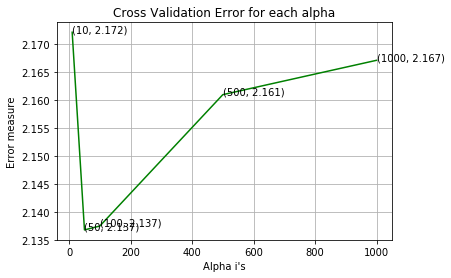

For values of best alpha =  50 The train log loss is: 1.1959362981291441
Number of misclassified points  9.336622513004773
-------------------------------------------------- Confusion matrix --------------------------------------------------


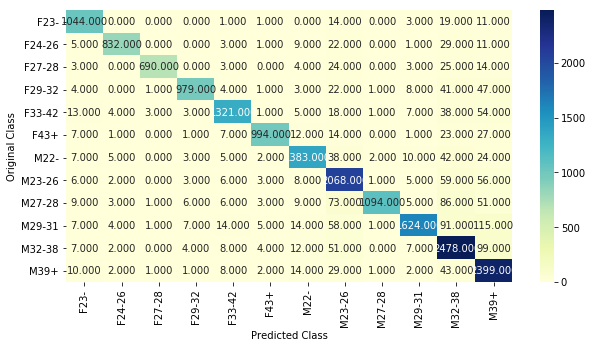

-------------------------------------------------- Precision matrix --------------------------------------------------


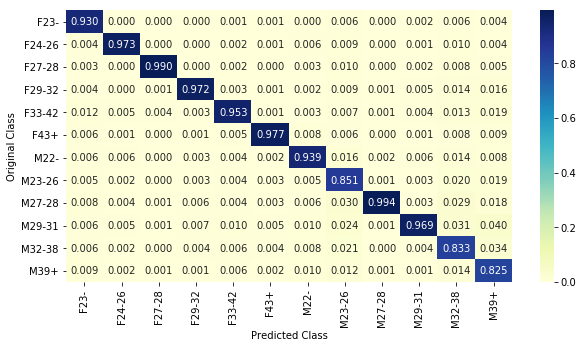

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


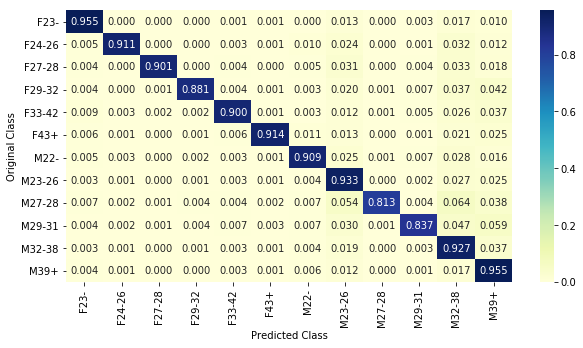

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
For values of best alpha =  50 The cross validation log loss is: 2.1367998802223447
Number of misclassified points  73.68082368082368
-------------------------------------------------- Confusion matrix --------------------------------------------------


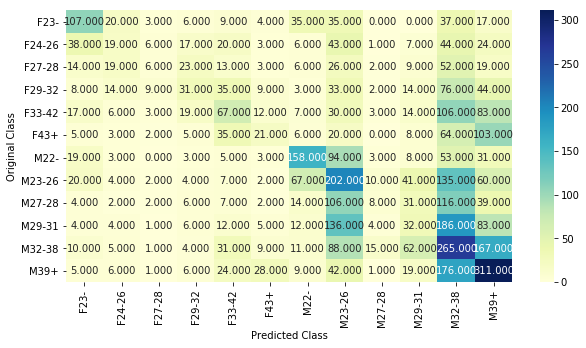

-------------------------------------------------- Precision matrix --------------------------------------------------


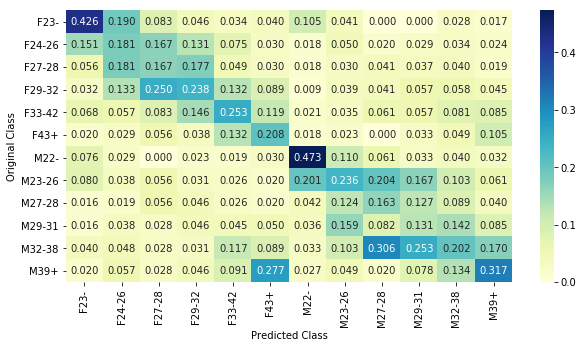

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


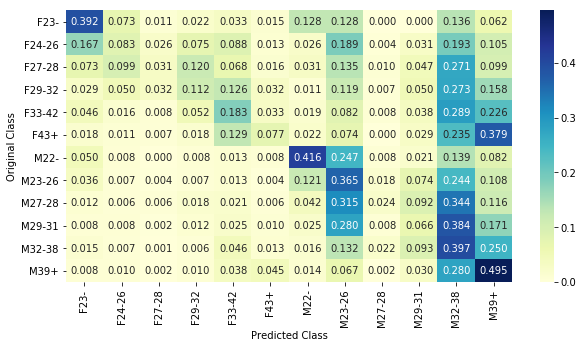

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000]
cv_log_error_array=[]
for i in alpha:
    print("Alpha {} in process".format(i))
    x_cfl=XGBClassifier(n_estimators=i,nthread  = 8,objective='multi:softprob',num_class=12,eval_metric='mlogloss')
    x_cfl.fit(X_train_we,y_train_we)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_we, y_train_we)
    predict_y = sig_clf.predict_proba(X_cv_we)
    cv_log_error_array.append(log_loss(y_cv_we, predict_y, labels=x_cfl.classes_, eps=1e-15))


for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=8,objective='multi:softprob',num_class=12,eval_metric='mlogloss')
x_cfl.fit(X_train_we,y_train_we)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_we, y_train_we)
    
predict_y = sig_clf.predict_proba(X_train_we)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_we, predict_y))
plot_confusion_matrix(y_train_we, sig_clf.predict(X_train_we))

predict_y = sig_clf.predict_proba(X_cv_we)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_we, predict_y))
plot_confusion_matrix(y_cv_we, sig_clf.predict(X_cv_we))




**Neural Network:**

In [ ]:
!wget --header="Host: doc-0g-6o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_o7k7vkj5s9imiouj80e98dpd6h26jfoj_nonce=2oba4phvqm62k" --header="Connection: keep-alive" "https://doc-0g-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/pda6k1rodunanv2stgcpv93u1ftnkur5/1602054075000/06830476918003228496/06830476918003228496/1hA3fixYZYWypuv0FaasjQIsZ2h6Y-6tN?e=download&authuser=0&nonce=2oba4phvqm62k&user=06830476918003228496&hash=ustvp5dhse28ilrcfq70n67aalqaj1tv" -c -O 'X_train_w_events.npz'

--2020-10-07 07:02:27--  https://doc-0g-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/pda6k1rodunanv2stgcpv93u1ftnkur5/1602054075000/06830476918003228496/06830476918003228496/1hA3fixYZYWypuv0FaasjQIsZ2h6Y-6tN?e=download&authuser=0&nonce=2oba4phvqm62k&user=06830476918003228496&hash=ustvp5dhse28ilrcfq70n67aalqaj1tv
Resolving doc-0g-6o-docs.googleusercontent.com (doc-0g-6o-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-0g-6o-docs.googleusercontent.com (doc-0g-6o-docs.googleusercontent.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip]
Saving to: ‘X_train_w_events.npz’

X_train_w_events.np     [  <=>               ]  22.44M  57.9MB/s    in 0.4s    

2020-10-07 07:02:28 (57.9 MB/s) - ‘X_train_w_events.npz’ saved [23526278]



In [ ]:
!wget --header="Host: doc-0s-6o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_o7k7vkj5s9imiouj80e98dpd6h26jfoj=06830476918003228496|1602054075000|4d6mbkjbq0q00vqjd791gj35j96oi14i" --header="Connection: keep-alive" "https://doc-0s-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/1jb02tkobkifr07lk82u8peujq9csfdc/1602054150000/06830476918003228496/06830476918003228496/1yTh-kkZgEtXcxWjy2yLGm1ZOqdZ5HRs6?e=download&authuser=0" -c -O 'labels_w_events.csv'

--2020-10-07 07:02:50--  https://doc-0s-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/1jb02tkobkifr07lk82u8peujq9csfdc/1602054150000/06830476918003228496/06830476918003228496/1yTh-kkZgEtXcxWjy2yLGm1ZOqdZ5HRs6?e=download&authuser=0
Resolving doc-0s-6o-docs.googleusercontent.com (doc-0s-6o-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-0s-6o-docs.googleusercontent.com (doc-0s-6o-docs.googleusercontent.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528219 (516K) [text/csv]
Saving to: ‘labels_w_events.csv’

labels_w_events.csv 100%[===================>] 515.84K  --.-KB/s    in 0.005s  

2020-10-07 07:02:50 (102 MB/s) - ‘labels_w_events.csv’ saved [528219/528219]



In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from keras.layers import Dense, Dropout, Activation, BatchNormalization,Input,PReLU
from keras.utils import np_utils
from keras.models import Sequential

from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import Adagrad
import datetime
from keras.callbacks import EarlyStopping,TensorBoard


In [4]:
!wget --header="Host: doc-0g-6o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_o7k7vkj5s9imiouj80e98dpd6h26jfoj_nonce=mnfrtd2b1r5es" --header="Connection: keep-alive" "https://doc-0g-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/dlvcs4n3d6k9ca1nej0quvjf56pu932n/1602084075000/06830476918003228496/06830476918003228496/1hA3fixYZYWypuv0FaasjQIsZ2h6Y-6tN?e=download&authuser=0&nonce=mnfrtd2b1r5es&user=06830476918003228496&hash=qq6935ltscsvcleekc5pdo6i1cns6ect" -c -O 'X_train_w_events.npz'

--2020-10-07 15:22:54--  https://doc-0g-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/dlvcs4n3d6k9ca1nej0quvjf56pu932n/1602084075000/06830476918003228496/06830476918003228496/1hA3fixYZYWypuv0FaasjQIsZ2h6Y-6tN?e=download&authuser=0&nonce=mnfrtd2b1r5es&user=06830476918003228496&hash=qq6935ltscsvcleekc5pdo6i1cns6ect
Resolving doc-0g-6o-docs.googleusercontent.com (doc-0g-6o-docs.googleusercontent.com)... 66.102.1.132, 2a00:1450:400c:c06::84
Connecting to doc-0g-6o-docs.googleusercontent.com (doc-0g-6o-docs.googleusercontent.com)|66.102.1.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip]
Saving to: ‘X_train_w_events.npz’

X_train_w_events.np     [   <=>              ]  22.44M  32.3MB/s    in 0.7s    

2020-10-07 15:22:56 (32.3 MB/s) - ‘X_train_w_events.npz’ saved [23526278]



In [5]:
!wget --header="Host: doc-0s-6o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_o7k7vkj5s9imiouj80e98dpd6h26jfoj=06830476918003228496|1602084075000|aao5k4ier5rpod7e2piguen7cg8316vs" --header="Connection: keep-alive" "https://doc-0s-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/5ritnnp7959ds9uhjjqg59m8v1g5cpd1/1602084150000/06830476918003228496/06830476918003228496/1yTh-kkZgEtXcxWjy2yLGm1ZOqdZ5HRs6?e=download&authuser=0" -c -O 'labels_w_events.csv'

--2020-10-07 15:23:15--  https://doc-0s-6o-docs.googleusercontent.com/docs/securesc/eishbh551eov3cr6ma625ojr1bra0ek3/5ritnnp7959ds9uhjjqg59m8v1g5cpd1/1602084150000/06830476918003228496/06830476918003228496/1yTh-kkZgEtXcxWjy2yLGm1ZOqdZ5HRs6?e=download&authuser=0
Resolving doc-0s-6o-docs.googleusercontent.com (doc-0s-6o-docs.googleusercontent.com)... 66.102.1.132, 2a00:1450:400c:c06::84
Connecting to doc-0s-6o-docs.googleusercontent.com (doc-0s-6o-docs.googleusercontent.com)|66.102.1.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528219 (516K) [text/csv]
Saving to: ‘labels_w_events.csv’

labels_w_events.csv 100%[===================>] 515.84K  --.-KB/s    in 0.004s  

2020-10-07 15:23:16 (112 MB/s) - ‘labels_w_events.csv’ saved [528219/528219]



In [2]:

X_train_wE =sparse.load_npz('X_train_w_events.npz')
#X_test_wE = sparse.load_npz('X_test_w_events.npz')
y_train_wE=pd.read_csv("labels_w_events.csv") 


In [3]:
def model_wE_1(input_dim,output_dim):
    model = Sequential()
    '''model.add(Dropout(0.15, input_shape=(input_dim,)))
    model.add(Dense(256, kernel_initializer='uniform'))
    model.add(PReLU(alpha_initializer='zero', weights=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.35))
    model.add(Dense(128, kernel_initializer='uniform'))
    model.add(PReLU(alpha_initializer='zero', weights=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.35))

    model.add(Dense(128, kernel_initializer='uniform'))
    model.add(PReLU(alpha_initializer='zero', weights=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.40))
    model.add(Dense(output_dim, kernel_initializer='uniform'))
    model.add(Activation('softmax'))'''
    model.add(Dropout(0.4, input_shape=(input_dim,)))
    model.add(Dense(75))
    model.add(PReLU())
    model.add(Dropout(0.30))
    model.add(Dense(50, kernel_initializer='normal', activation='tanh'))
    model.add(PReLU())
    model.add(Dropout(0.20))
    model.add(Dense(output_dim, kernel_initializer='normal', activation='softmax'))

    opt = Adagrad(lr=0.008, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


In [4]:
model_2=model_wE_1(X_train_wE.shape[1],12)
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 22019)             0         
_________________________________________________________________
dense (Dense)                (None, 75)                1651500   
_________________________________________________________________
p_re_lu (PReLU)              (None, 75)                75        
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3800      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 50)                50        
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0

In [5]:
tensorboard_callback = TensorBoard(log_dir='modelwE1_graph',histogram_freq=1)
early_stop_1=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)


In [6]:
train, cv, y_train, y_cv = train_test_split(X_train_wE.todense(), y_train_wE['label'],stratify= y_train_wE['label'],test_size=0.15,random_state=9)



y_train_nn=np_utils.to_categorical(y_train)
y_cv_nn=np_utils.to_categorical(y_cv)

In [7]:
import keras

def get_network_2_1_models(n_models):
    """
    Takes number of models,  Trains Neural Network 1 for n_model times,
    stores the models in a list and returns the models
    """
    model_list_2=[]
    avg_cv_loss=0
    for i in range(len(n_models)):
        keras.backend.clear_session()
        #train, cv, y_train, y_cv = train_test_split(X_train_wE.todense(), y_train_wE['label'],stratify= y_train_wE['label'],test_size=0.15,random_state=i)
        #y_train_nn=np_utils.to_categorical(y_train)
        #y_cv_nn=np_utils.to_categorical(y_cv)
        model=model_wE_1(X_train_wE.shape[1],12)
        #logdir = os.path.join("logs_301","Model_2_1."+str(i+1))
        #t_callback=TensorBoard(log_dir=logdir)
        model.fit(train, y_train_nn, batch_size=64, epochs=80, verbose=1, validation_data=(cv, y_cv_nn),callbacks=[early_stop_1,tensorboard_callback])
        model_cv_prediction=model.predict_proba(cv)
        cv_loss=log_loss(y_cv, model_cv_prediction)
        print("CV Log Loss of Best Weights Model in Current Run: ",cv_loss)
        model_list_2.append(model)
        avg_cv_loss+=cv_loss
    avg_cv_loss/=len(n_models)
    print("Average CV Loss of "+str(len(n_models))+" Runs :",avg_cv_loss)
    return model_list_2

In [20]:
import keras
keras.backend.clear_session()

In [ ]:
random_seeds=[9,27,45,64,63]
model_list_2=get_network_2_1_models(random_seeds)


Epoch 1/80
  1/310 [..............................] - ETA: 0s - loss: 2.5108 - accuracy: 0.0469WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
310/310 [==============================] - 4s 14ms/step - loss: 2.3347 - accuracy: 0.1764 - val_loss: 2.1652 - val_accuracy: 0.2402
Epoch 2/80
310/310 [==============================] - 3s 10ms/step - loss: 2.1404 - accuracy: 0.2496 - val_loss: 2.0897 - val_accuracy: 0.2757
Epoch 3/80
310/310 [==============================] - 3s 10ms/step - loss: 2.0593 - accuracy: 0.2788 - val_loss: 2.0326 - val_accuracy: 0.2994
Epoch 4/80
310/310 [==============================] - 3s 10ms/step - loss: 2.0075 - accuracy: 0.2932 - val_loss: 2.0247 - val_accuracy: 0.2985
Epoch 5/80
310/310 [==============================] - 4s 13ms/step